### Import Packages 

In [1]:
import matplotlib
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt
# to make the plots display inline 
%matplotlib inline

In [2]:
df = pd.read_csv("adult.csv")
print("Dimensions: ", df.shape)
df.head(10)

Dimensions:  (32571, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Inspect the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32571 entries, 0 to 32570
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32571 non-null  int64 
 1   workclass       32571 non-null  object
 2   fnlwgt          32571 non-null  int64 
 3   education       32571 non-null  object
 4   education-num   32571 non-null  int64 
 5   marital-status  32571 non-null  object
 6   occupation      32571 non-null  object
 7   relationship    32571 non-null  object
 8   race            32571 non-null  object
 9   sex             32571 non-null  object
 10  capital-gain    32571 non-null  int64 
 11  capital-loss    32571 non-null  int64 
 12  hours-per-week  32571 non-null  int64 
 13  native-country  32571 non-null  object
 14  income          32571 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Insight:** There are 6 numerical columns and 9 columns that contain different categories. For now there do not seem to be any missing data in this datatset. However, we must look closely to get a good idea. 

### Check for typographical errors

In [4]:
# Convert object columns to category
for column in df.select_dtypes(['object']).columns:
    df[column] = df[column].astype('category')
df.dtypes    

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

In [5]:
### Check the values contained in each of the categorical variables
category_columns = df.select_dtypes(['category']).columns
for column in category_columns:
    print(df[column].value_counts(), '\n')

 Private             22704
 Self-emp-not-inc     2542
 Local-gov            2093
 ?                    1836
 State-gov            1299
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

 HS-grad         10505
 Some-college     7294
 Bachelors        5357
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1068
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

 Married-civ-spouse       14980
 Never-married            10687
 Divorced                  4444
 Separated                 1025
 Widowed                    994
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 

 Prof-specialty       4142
 Craft-repair         4101
 Exec-mana

**Insight(s)**: 
  - There are null values but they are represented as ' ?' in `workclass`, `occupation` and `native-country`.
  - Each string contains an additional space at the beginning. 

### Check for cardinality

In [6]:
# A way to get the number of unique values for all features
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

**Insight**: There are no constant columns

### Check for missing values

In [7]:
df = df.replace(' ?', np.nan)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     585
income               0
dtype: int64

**Insight**: We're missing values `workclass`, `occupation` and `native-country`. However, there could be some records common to both `workclass` and `occupation`

### Check for duplicated data: 

In [8]:
df[df.duplicated()].shape[0]

34

**Insight**: There are 34 duplicated rows

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32571.0,38.582512,13.640623,17.0,28.0,37.0,48.0,90.0
fnlwgt,32571.0,189786.316693,105548.390541,12285.0,117833.0,178383.0,237065.0,1484705.0
education-num,32571.0,10.080777,2.572477,1.0,9.0,10.0,12.0,16.0
capital-gain,32571.0,1077.317982,7384.182377,0.0,0.0,0.0,0.0,99999.0
capital-loss,32571.0,87.277026,402.901257,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32571.0,40.437506,12.345725,1.0,40.0,40.0,45.0,99.0


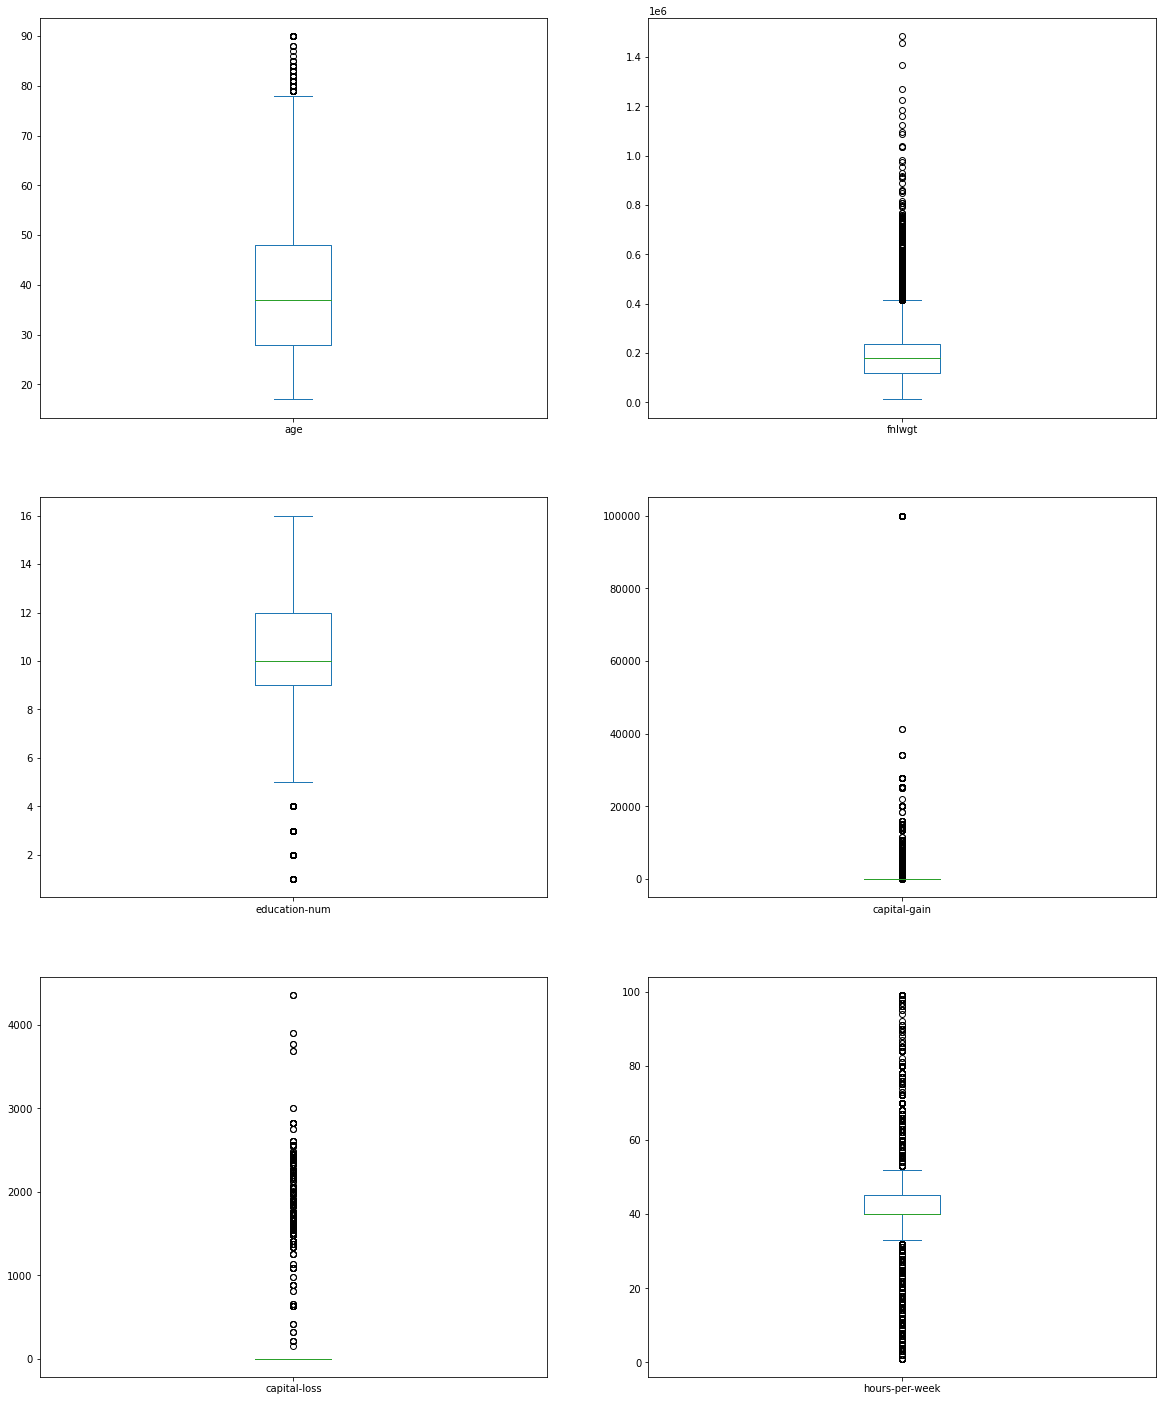

In [10]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
df[numeric_columns].plot(kind='box', subplots=True, figsize=(20,25), layout=(3, 2), sharex=False, sharey=False);

**Insight**: `capital-gain`, `capital-loss` needs further inspection.

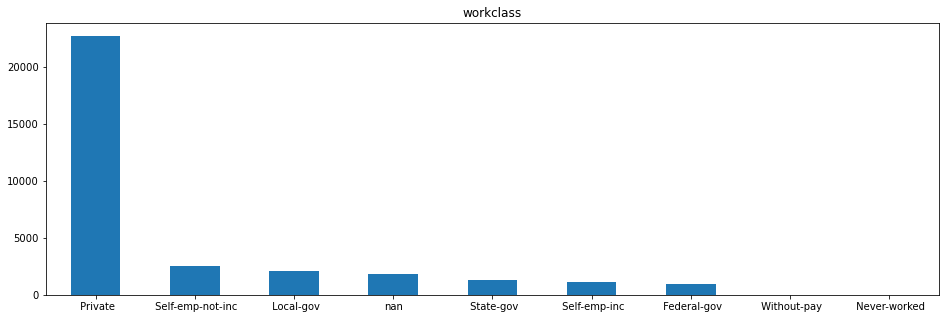

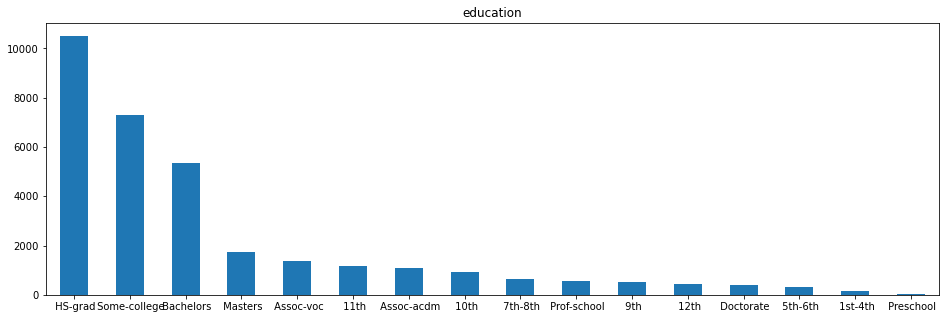

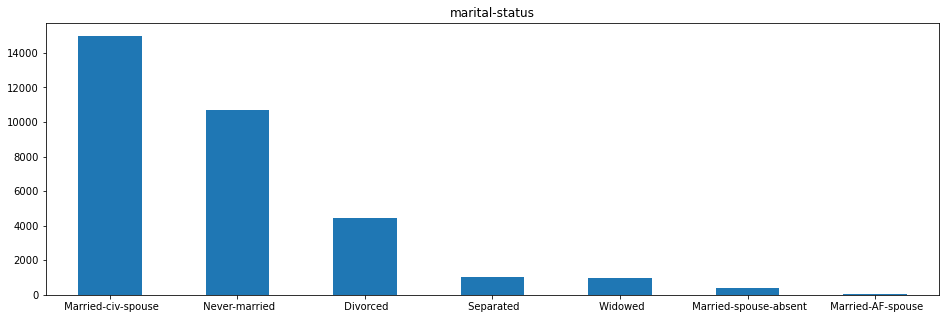

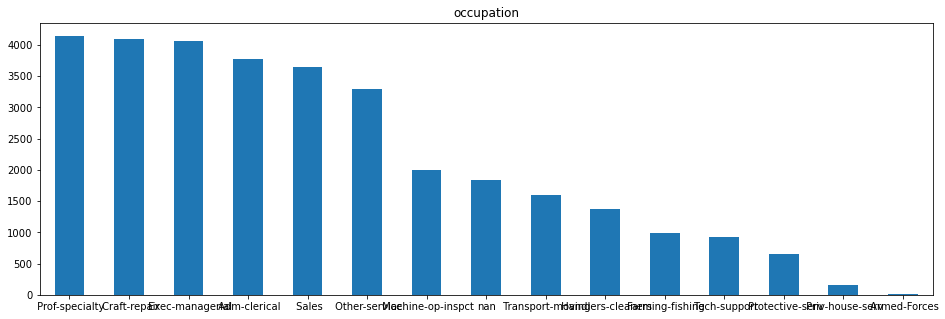

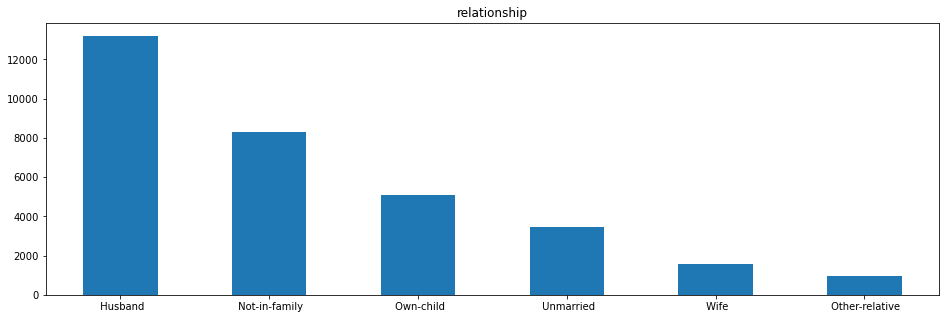

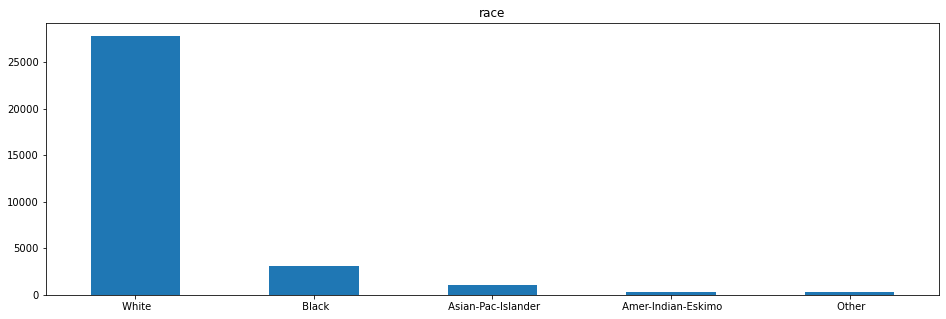

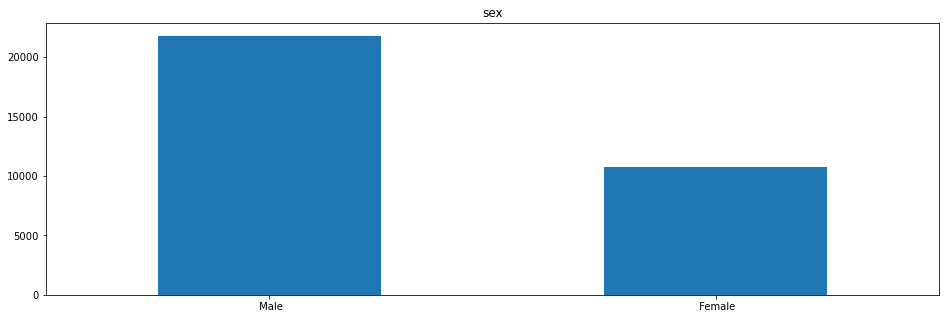

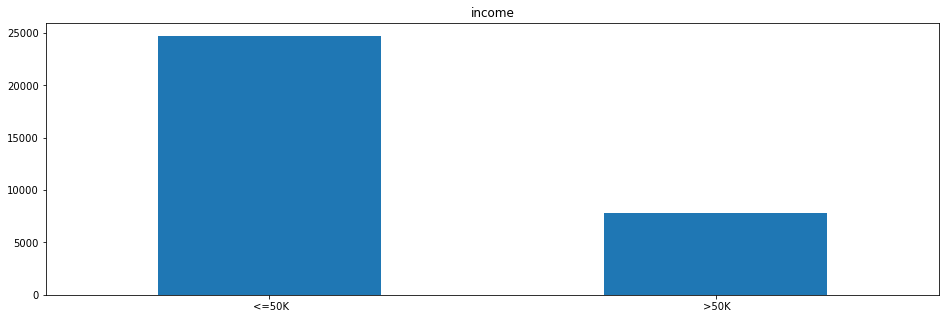

In [11]:
categorical_columns = df.select_dtypes(['category']).columns
for column in categorical_columns:
    if(column!='native-country'): # skipping this as there are many countries
        df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(16,5), rot=0)
        plt.show()

**Insight**: Our target variable, `income`, is imbalanced`

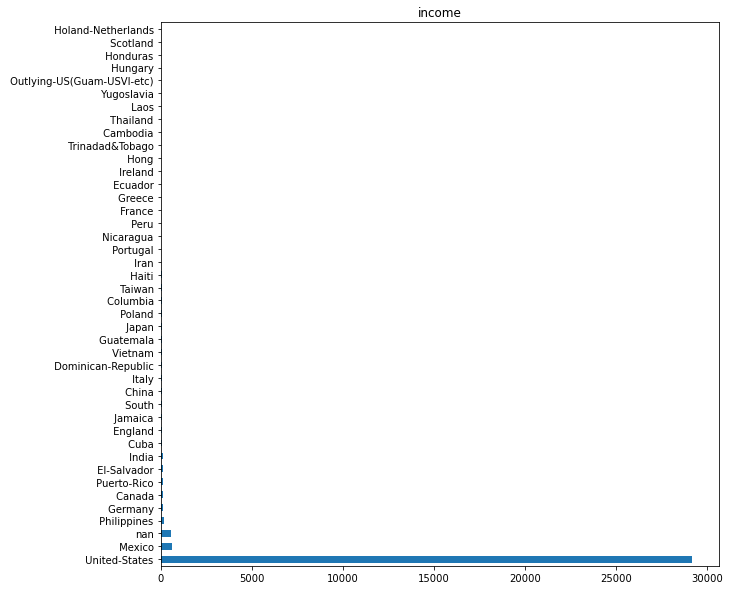

In [12]:
#### Check value counts for native country as there are too many categories to plot.
df['native-country'].value_counts(dropna=False).plot(kind='barh', title=column, figsize=(10,10), rot=0);

In [13]:
df['native-country'].value_counts(dropna=False)

 United-States                 29177
 Mexico                          644
NaN                              585
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

**Insight**: 'South' listed in `native-country` seems invalid. drop entries where value is 'South'.

### Investigation specific to dataset:-

#### a. Check if education and education-num are the same? 

In [14]:
education_feature_check = df.groupby(['education', 'education-num']).size()
education_feature_check[education_feature_check!=0]

education      education-num
 10th          6                  933
 11th          7                 1175
 12th          8                  433
 1st-4th       2                  168
 5th-6th       3                  333
 7th-8th       4                  646
 9th           5                  514
 Assoc-acdm    12                1068
 Assoc-voc     11                1382
 Bachelors     13                5357
 Doctorate     16                 413
 HS-grad       9                10505
 Masters       14                1723
 Preschool     1                   51
 Prof-school   15                 576
 Some-college  10                7294
dtype: int64

**Insight**: Each `education` category corresponds to only one `education-num`. This implies both represent the same information and one column can be eliminated.

#### b. Investigate the missing values of workclass and occupation

In [15]:
df[df['workclass'].isna() & df['occupation'].isna()].shape

(1836, 15)

**Insight**: There are ~1800 records with `workclass` and `occupation` information missing. Without either of these features, it will be difficult to assess the income of the individual therefore drop the rows with missing info here. 

### Summary of the issues in data and potential handling strategies


| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|age (int64)                          |   None|Keep as is|
workclass (category)             | Contains missing values              | drop rows with missing values       
fnlwgt (int64)       | Too many unique values | drop this feature as no useful information can be obtained|
education (category)             | Same as education-num       | drop feature  | 
education-num (int64)                 | None | Keep as is|   
marital-status (category)                | None | Keep as is|
occupation (category)    | Contains missing values (related to workclass) | mostly drop rows with missing values, some need investigation |
relationship (category)         | Some essence of this is captured in marital-status | Might be able to drop the column|
race (category)                  | None | Keep as is|   
sex (category)                 | None | Keep as is|   
capital-gain (int64)                    | Many values are 0 | Convert to categorical data perhaps to obtain useful insights|   
capital-loss (int64)             | Many values are 0 | Convert to categorical data perhaps to obtain useful insights| 
hours-per-week (int64)               | Too many outliers | Convert to categorical data perhaps to obtain useful insights| 
native-country (category)        | Too many values | Reduce categories by considering continent instead of countries perhaps? Needs more investigation for missing values, drop invalid enties|
income                 (category) |Unbalanced number of 0 and 1 (proportion of 0: 75%)  | Leave as is; may consider sampling strategies to balance the training dataset|

### Clean the data using the strategies:¶

In [16]:
# Keep a copy of the original data
df_raw = df.copy()

In [17]:
# remove additional spaces from the string
categorical_features = df.select_dtypes(['category'])
df[categorical_features.columns] = categorical_features.apply(lambda x: x.str.strip())

In [18]:
# Drop columns
df = df.drop('fnlwgt', axis=1)
df = df.drop('education', axis=1)
df = df[df["native-country"].str.contains("South")==False]
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
# Drop duplicates 
df = df.drop_duplicates()

In [20]:
df.dropna(subset=['workclass'], inplace=True)
df.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        7
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

**Insight**: Occupation still has 7 missing values and native-country has 553 missing values.

In [21]:
df[df['occupation'].isna()]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5364,18,Never-worked,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10850,23,Never-worked,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14777,17,Never-worked,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20343,18,Never-worked,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23238,20,Never-worked,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32314,30,Never-worked,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32324,18,Never-worked,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [22]:
df['occupation'] = df['occupation'].replace(np.nan, "None")

In [23]:
pd.unique(df['race'][df['native-country'].isna()])

array([], dtype=object)

In [24]:
nativeCountryRace = df.groupby(['native-country', 'race']).size().reset_index().rename(columns={0: 'count'})
nativeCountryRace.head(2)

,native-country,race,count
0,Cambodia,Asian-Pac-Islander,18
1,Canada,Asian-Pac-Islander,1


In [25]:
nativeCountryRace[nativeCountryRace['race']=='White'].sort_values('count', ascending=False)[:5]

,native-country,race,count
99,United-States,White,21062
66,Mexico,White,549
30,Germany,White,118
3,Canada,White,105
20,El-Salvador,White,95


In [26]:
nativeCountryRace[nativeCountryRace['race']=='Black'].sort_values('count', ascending=False)[:5]

,native-country,race,count
97,United-States,Black,2548
54,Jamaica,Black,74
36,Haiti,Black,41
93,Trinadad&Tobago,Black,15
13,Dominican-Republic,Black,12


In [27]:
nativeCountryRace[nativeCountryRace['race']=='Asian-Pac-Islander'].sort_values('count', ascending=False)[:5]

,native-country,race,count
96,United-States,Asian-Pac-Islander,272
75,Philippines,Asian-Pac-Islander,178
44,India,Asian-Pac-Islander,85
4,China,Asian-Pac-Islander,66
100,Vietnam,Asian-Pac-Islander,62


In [28]:
nativeCountryRace[nativeCountryRace['race']=='Other'].sort_values('count', ascending=False)[:5]

,native-country,race,count
98,United-States,Other,113
65,Mexico,Other,38
85,Puerto-Rico,Other,20
14,Dominican-Republic,Other,18
16,Ecuador,Other,9


**Insight**: Since majority of the `race` that contain missing values in `native-country` are from United-States, we shall fill all the missing values in `native-country` with 'United-States'

In [29]:
#Since majority of the Whites are from US in this dataset, fill the missing country as US when the race is white  
df['native-country'] = df['native-country'].replace(np.nan, 'United-States')
df[df['native-country'].isna()].shape

(0, 13)

In [30]:
region = {'Asia_East': ["Cambodia", "China", "Hong", "Laos", "Thailand", "Japan", "Taiwan", "Vietnam", 'Philippines'],
          'Asia_Central' : ["India", "Iran"],
          'Central_America' : ["Cuba", "Guatemala", "Jamaica", "Nicaragua", "Puerto-Rico",  "Dominican-Republic", 
                               "El-Salvador", "Haiti", "Honduras", "Mexico", "Trinadad&Tobago"],
          'South_America' : ["Ecuador", "Peru", "Columbia"],
          "North_America": ["United-States", "Canada", 'Outlying-US(Guam-USVI-etc)',  ''],
          'Europe_West' : ["England", "Germany", "Holand-Netherlands", "Ireland", "France", "Greece", 
                           "Italy", "Portugal", "Scotland"],
          'Europe_East': ["Poland", "Yugoslavia", "Hungary"]}

df['native-region'] = df['native-country'].map({item: k for k, v in region.items() for item in v})
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-region
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North_America
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North_America
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North_America
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North_America
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Central_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32563,32,Private,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,Asia_East
32564,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,North_America
32565,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,North_America
32568,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,North_America


In [31]:
df[df['native-region'].isna()]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-region


In [32]:
df = df.drop('native-country', axis=1)

#### Handling numerical values

In [33]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,26840.000000,26840.000000,26840.000000,26840.000000,26840.000000
mean,39.044300,10.141170,1216.448957,98.381930,41.152496
std,13.190971,2.620771,7812.924339,425.420896,12.340643
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


**Insight**: `capital-gain` and `capital-loss` have many 0s. Let's plot boxplots ignoring the 0s and check the disribution

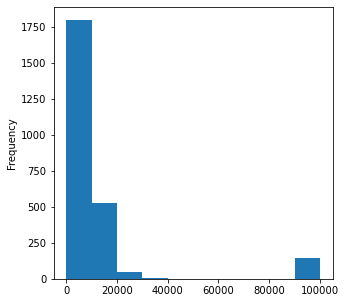

In [34]:
df[df['capital-gain'] >0]['capital-gain'].plot(kind='hist', subplots=True, figsize=(5,5));

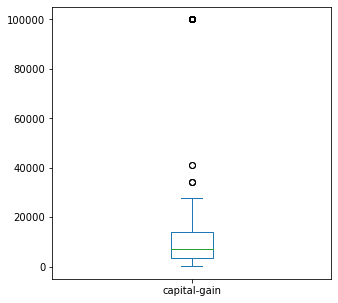

In [35]:
df[df['capital-gain'] >0]['capital-gain'].plot(kind='box', subplots=True, figsize=(5,5));

In [36]:
df[df['capital-gain'] >0]['capital-gain'].describe()

count     2520.000000
mean     12956.146825
std      22320.746110
min        114.000000
25%       3462.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital-gain, dtype: float64

**Insight**: The majority of people with positive capital gain have a capital gain between 0 and 25,000 dollars, and there are also about 150 people with capital gain of around 100,000 dollars. We also note that the most people with positive capital gain are those with about 5,000 dollars.

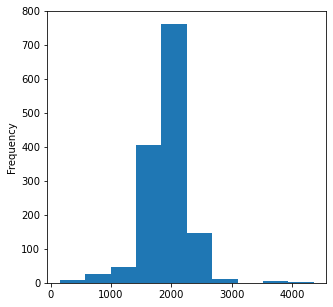

In [37]:
df[df['capital-loss'] >0]['capital-loss'].plot(kind='hist', subplots=True, figsize=(5,5));

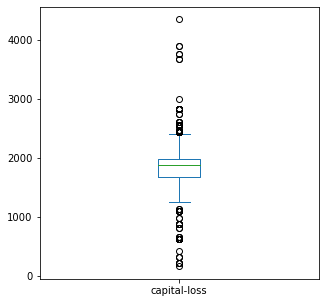

In [38]:
df[df['capital-loss'] >0]['capital-loss'].plot(kind='box', subplots=True, figsize=(5,5));

In [39]:
df[df['capital-loss'] >0]['capital-loss'].describe()

count    1414.000000
mean     1867.447666
std       362.871113
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital-loss, dtype: float64

**Insight**: Most values are between 1,700 and 2,000 dollars (as already stated), and there are a lot of outliers. From the histogram we also see that the most people have a capital loss of about 1,875 dollars.

The box plots and histograms illustrate visually the results of the summary statistics for the nonzero capital gain and capital loss. Based on these results, we will group the values of the variables “capital_loss” and “capital gain” into categories and we will create two new factor variables called “cap_gain” and “cap_loss”. We do the grouping in the following way:

Capital gain:

We mark all values of “capital_gain” which are less than the first quartile of the nonzero capital gain (which is equal to 3464) as “Low”; all values that are between the first and third quartile (between 3464 and 14080) - as “Medium”; and all values greater than or equal to the third quartile are marked as “High”.
Capital loss:

We mark all values of “capital_loss” which are less than the first quartile of the nonzero capital gain (which is equal to 1672) as “Low”; all values that are between the first and third quartile (between 1672 and 1977) - as “Medium”; and all values greater than or equal to the third quartile are marked as “High”.

In [40]:
m1 = (df['capital-gain']<3464)
m2 = ((df['capital-gain']>=3464) & (df['capital-gain']<=14080))
m3 = (df['capital-gain']>14080)

vals = [ "Low", "Medium", "High"]

df['capital-gain'] = np.select([m1,m2,m3], vals)

In [41]:
m1 = (df['capital-loss']< 1672)
m2 = ((df['capital-loss']>= 1672) & (df['capital-loss']<= 1977))
m3 = (df['capital-loss']> 1977)

vals = [ "Low", "Medium", "High"]

df['capital-loss'] = np.select([m1,m2,m3], vals)

In [42]:
df['hours-per-week'].describe()

count    26840.000000
mean        41.152496
std         12.340643
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [43]:
m1 = (df['hours-per-week']< 40)
m2 = ((df['hours-per-week']>= 40) & (df['hours-per-week']<= 45))
m3 = (df['hours-per-week']> 45)

vals = [ "Low", "Medium", "High"]

df['hours-per-week'] = np.select([m1,m2,m3], vals)

In [48]:
converted_columns = ['capital-gain','capital-loss','hours-per-week']
for column in converted_columns:
    print(df[column].value_counts(), '\n')

Low       24950
Medium     1253
High        637
Name: capital-gain, dtype: int64 

Low       25753
Medium      771
High        316
Name: capital-loss, dtype: int64 

Medium    14071
High       6504
Low        6265
Name: hours-per-week, dtype: int64 



In [44]:
df.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
native-region     0
dtype: int64

In [49]:
df.to_csv('adult_census_cleaned.csv')
df.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,native-region
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,Low,Low,Medium,<=50K,North_America
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low,Low,Low,<=50K,North_America
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,Low,Low,Medium,<=50K,North_America
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Low,Low,Medium,<=50K,North_America
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Low,Low,Medium,<=50K,Central_America
